# Making Clusters Using Machine Learning.

we're going to take following approch :

1. Problem defination
2. Data
3. Evaluation
4. Featuring
5. Modeling
6. Experimentation

## 1. Problem Defination:

In a statement,
> Given the retail store parameter about customers, can we find the pattern between customers based on:

> To create different marketing strategy for cutomers present in different clusters.

## 2 Data

> The Origanal data came from  Kaggle: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

## 3. Evaluation

> The gole of most cluster based problem is to find best cluster size for given problem statement.

## 4 Features

* CustomerID: Unique ID assigned to the customer
* Gender: Gender of the customer
* Age: Age of the customer
* Annual Income (k$): Annual Income of the customee
* Spending Score: Score assigned by the mall based on customer behavior and spending nature


In [1]:
#Import required libararies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn')

In [2]:
#Loading the data into dataframe.
df = pd.read_csv('Mall_Customers.csv')

#Having a look at data.
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Having a look at shape of data.
df.shape

(200, 5)

* As we can see we have 200 rows and 5 columns in dataset.

In [4]:
#Having a look at datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#Having a look at missing values.
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

* As we can see, we don't have any kind of missing values.

In [6]:
#Having a look at aggregation.
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


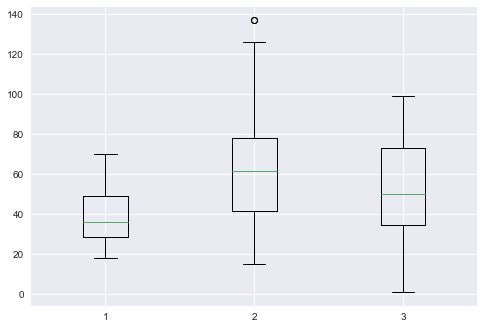

In [7]:
#Having a look at outliers.
plt.boxplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']]);

* As we can see, we have only one outlier in Annual Income (k$) column.

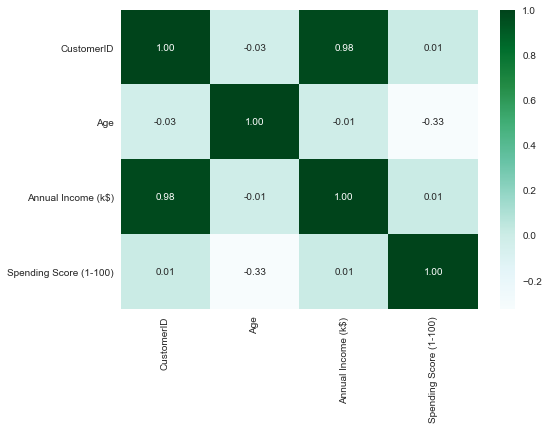

In [8]:
#Having a look at correlation.
sns.heatmap(df.corr(),
            annot = True,
            fmt = '0.2f',
            cmap = 'BuGn');

* In this correlation metrix:
    1. Higher the positive values represent the Higher the positive correlation.
    2. Higher the negative values represent the Higher the negative correlation.

# Data Interpretaion and Representation

In [9]:
#Having a look at data.
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
#Having a look at Gender Distribution.
Gender_count = df['Gender'].value_counts()
Gender_count

Female    112
Male       88
Name: Gender, dtype: int64

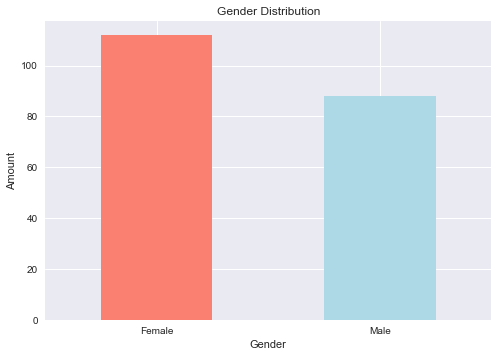

In [11]:
#Visualizing
Gender_count.T.plot(kind = 'bar', color = ['salmon','lightblue'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.xticks(rotation = 0);

* As we can see, we have more amount of females as compare to males.

In [12]:
#Let's split the age column.
Age_18_25 = df.Age[(df['Age'] > 18) & (df['Age'] < 25)]
Age_25_35 = df.Age[(df['Age'] > 25) & (df['Age'] < 35)]
Age_35_45 = df.Age[(df['Age'] > 35) & (df['Age'] < 45)]
Age_45_55 = df.Age[(df['Age'] > 45) & (df['Age'] < 55)]
Age_55 = df.Age[(df['Age'] > 55)]

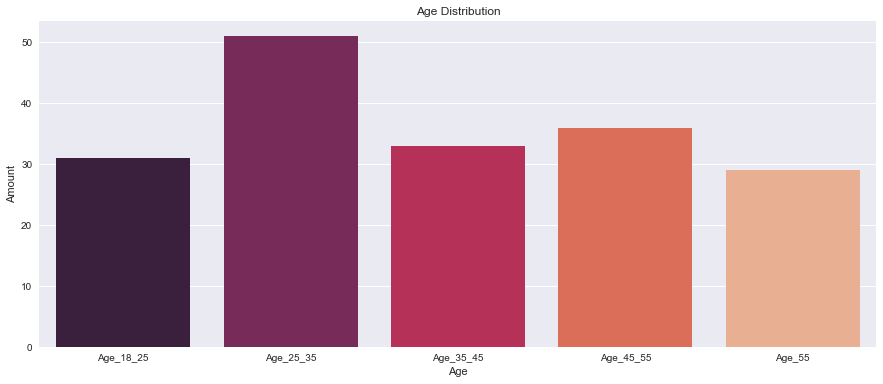

In [13]:
#Visualization.
agex = ['Age_18_25', 'Age_25_35', 'Age_35_45', 'Age_45_55', 'Age_55']
agey = [len(Age_18_25.values), len(Age_25_35.values), len(Age_35_45.values),  len(Age_45_55.values),  len(Age_55.values)]

plt.figure(figsize = (15,6))
sns.barplot(x = agex, y = agey, palette= 'rocket' )
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.xticks(rotation = 0);

* As we can see, the majority of the customers are present in the range of 25 to 35 Age.

In [14]:
#Having a look at data.
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
#Let's split Annual Income.
AI_15_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] > 15) & (df['Annual Income (k$)'] < 30)]
AI_30_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] > 30) & (df['Annual Income (k$)'] < 60)]
AI_60_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] > 60) & (df['Annual Income (k$)'] < 90)]
AI_90_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] > 90) & (df['Annual Income (k$)'] < 120)]
AI_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] > 120)]

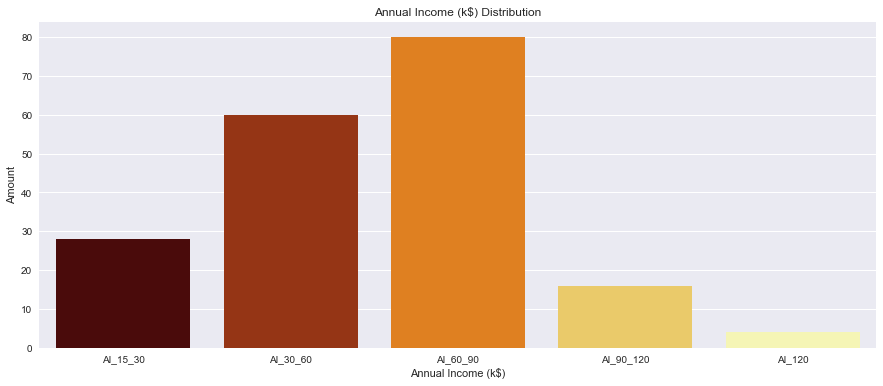

In [16]:
#Visualization.
AIx = ['AI_15_30', 'AI_30_60', 'AI_60_90', 'AI_90_120', 'AI_120']
AIy = [len(AI_15_30.values), len(AI_30_60.values), len(AI_60_90.values),  len(AI_90_120.values),  len(AI_120.values)]

plt.figure(figsize = (15,6))
sns.barplot(x = AIx, y = AIy, palette= 'afmhot' )
plt.title('Annual Income (k$) Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Amount')
plt.xticks(rotation = 0);

* As we can see, the highest customers have Annual Income (k$) between the range of 40 to 60.

In [17]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
SS_0_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] > 0) & (df['Spending Score (1-100)'] < 20)]
SS_20_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] > 20) & (df['Spending Score (1-100)'] < 40)]
SS_40_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] > 40) & (df['Spending Score (1-100)'] < 60)]
SS_60_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] > 60) & (df['Spending Score (1-100)'] < 80)]
SS_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] > 80)]

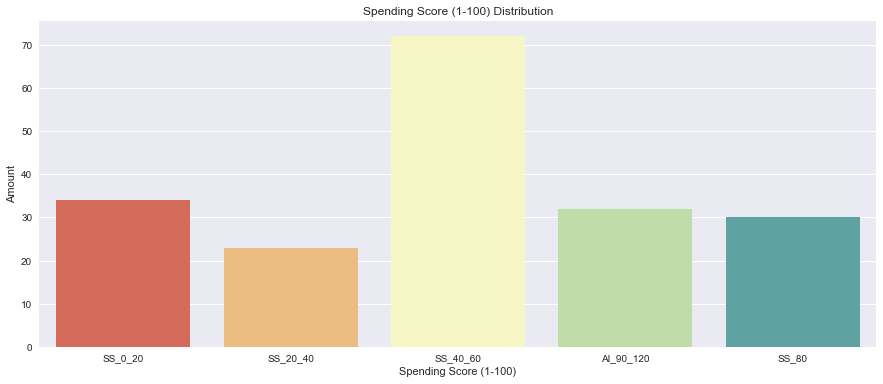

In [19]:
#Visualization.
SSx = ['SS_0_20', 'SS_20_40', 'SS_40_60', 'AI_90_120', 'SS_80']
SSy = [len(SS_0_20.values), len(SS_20_40.values), len(SS_40_60.values),  len(SS_60_80.values),  len(SS_80.values)]

plt.figure(figsize = (15,6))
sns.barplot(x = SSx, y = SSy, palette= 'Spectral' )
plt.title('Spending Score (1-100) Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Amount')
plt.xticks(rotation = 0);

* As we can see, the highest customer Spending Score (1-100) between the range of 40 to 60.

In [20]:
#Importing required libraries.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [21]:
#Taking two Independent Variables.
X1 = df[['Age','Annual Income (k$)']]

In [22]:
#Initializing Kmeans.
wcss = []

for i in range(2,10):
    
    kmeans = KMeans(n_clusters = i,
                    max_iter = 50)
    
    # fit the data in kmean
    kmean=kmeans.fit(X1)
    
    wcss.append(kmean.inertia_)
    

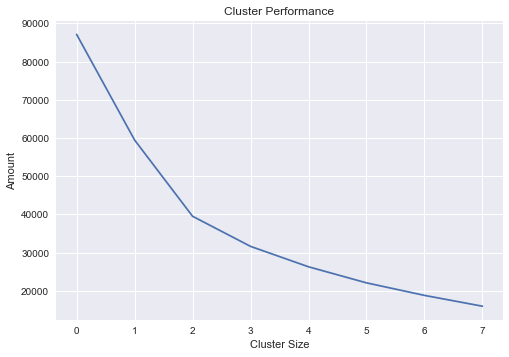

In [23]:
#Visualizing wcss.
plt.plot(wcss)
plt.title("Cluster Performance")
plt.xlabel("Cluster Size")
plt.ylabel("Amount");

* As we can see, the Elbow curve suddenly decreases from cluster size 2. 

In [24]:
#Validating Kmeans.
wcss = []

for i in range(2,10):
    
    kmeans = KMeans(n_clusters = i,
                    max_iter = 50)
    
    # fit the data in kmean
    kmean=kmeans.fit(X1)
    
    cluster_labels = kmean.labels_
    
    s_score = silhouette_score(X1,cluster_labels)
    
    print("For n_clusters={0}, the silhouette score is {1}".format(i, s_score))
    

For n_clusters=2, the silhouette score is 0.42620850066216065
For n_clusters=3, the silhouette score is 0.4254725038202792
For n_clusters=4, the silhouette score is 0.43295184273333076
For n_clusters=5, the silhouette score is 0.40366620604639963
For n_clusters=6, the silhouette score is 0.40515323525517727
For n_clusters=7, the silhouette score is 0.38625985844335564
For n_clusters=8, the silhouette score is 0.394791367653872
For n_clusters=9, the silhouette score is 0.3908479326377678


* As we can see, n_clusters=4 give us the higher s_scor.

In [25]:
#Let's go with cluster size 4.
kmeans = KMeans(n_clusters = 4,
                    max_iter = 50)
    
# fit the data in kmean
kmean=kmeans.fit(X1)

In [26]:
#Let's make prediction.
pred = kmean.predict(X1)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

* As we can see, Based on Annual Income (k$). We are dividing our data into 4 group of clusters.

In [27]:
#Having a look at data.
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
#Droping Spending score column.
df1 = df.drop('Spending Score (1-100)',axis = 1)

#Adding cluster_Annual_income column.
df1['cluster_Annual_income'] = pred

#Having a look at data now.
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),cluster_Annual_income
0,1,Male,19,15,1
1,2,Male,21,15,1
2,3,Female,20,16,1
3,4,Female,23,16,1
4,5,Female,31,17,1


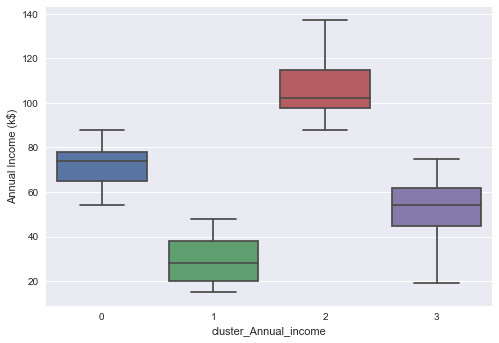

In [29]:
#Visualizing cluster with Annual Income (k$) column.
sns.boxplot(x ="cluster_Annual_income", y = "Annual Income (k$)", data = df1 );

* As we can see:
    1. In cluster 0: Annual income vary between the range of 0 to 50.
    2. In cluster 1: Annual income vary between the range of 55 to 90.
    3. In cluster 2: Annual income vary between the range of 20 to 75.
    4. In cluster 3: Annual income vary between the range of 90 to 140.

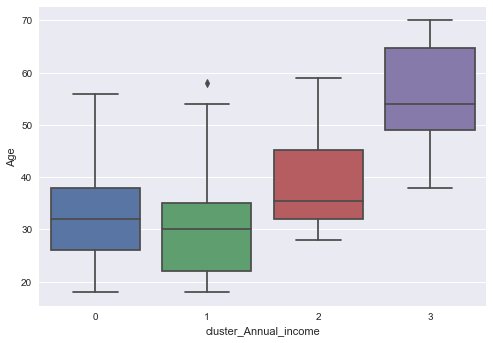

In [30]:
#Visualizing cluster with Age column.
sns.boxplot(x ="cluster_Annual_income", y = "Age", data = df1 );

* As we can see:
    1. In cluster 0: Age vary between the range of 10 to 55.
    2. In cluster 1: Age vary between the range of 10 to 58.
    3. In cluster 2: Age vary between the range of 38 to 70.
    4. In cluster 3: Age vary between the range of 28 to 59.

In [31]:
#Taking two Independent Variables.
X1 = df[['Age','Spending Score (1-100)']]

In [32]:
#Initializing Kmeans.
wcss = []

for i in range(2,10):
    
    kmeans = KMeans(n_clusters = i,
                    max_iter = 50)
    
    # fit the data in kmean
    kmean=kmeans.fit(X1)
    
    wcss.append(kmean.inertia_)


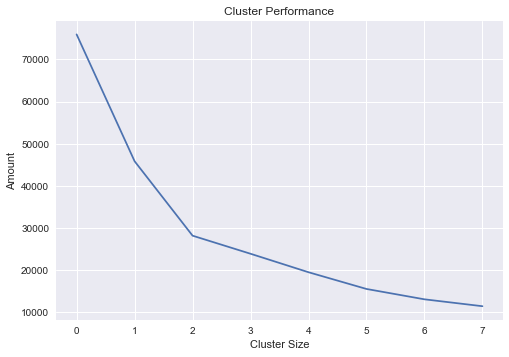

In [33]:
#Visualizing wcss.
plt.plot(wcss)
plt.title("Cluster Performance")
plt.xlabel("Cluster Size")
plt.ylabel("Amount");

* As we can see, the Elbow curve suddenly decreases from cluster size 2. 

In [34]:
#Validating Kmeans.
wcss = []

for i in range(2,10):
    
    kmeans = KMeans(n_clusters = i,
                    max_iter = 50)
    
    # fit the data in kmean
    kmean=kmeans.fit(X1)
    
    cluster_labels = kmean.labels_
    
    s_score = silhouette_score(X1,cluster_labels)
    
    print("For n_clusters={0}, the silhouette score is {1}".format(i, s_score))
    

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.4403873402189254
For n_clusters=6, the silhouette score is 0.4405479018621985
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.42721796304676685
For n_clusters=9, the silhouette score is 0.41649871987078496


* As we can see, n_clusters=4 give us the higher s_scor.

In [35]:
#Let's go with cluster size 4.
kmeans = KMeans(n_clusters = 4,
                    max_iter = 50)
    
# fit the data in kmean
kmean=kmeans.fit(X1)

#Let's make prediction.
pred = kmean.predict(X1)
pred

array([2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0,
       1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 3, 2,
       1, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 0, 2, 0, 3, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

* As we can see, Based on Spending Score(1-100). We are dividing our data into 4 group of clusters.

In [36]:
#Having a look at data.
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
#Droping Spending score column.
df2 = df.drop('Annual Income (k$)',axis = 1)

#Adding cluster_Annual_income column.
df2['cluster_Spending Score'] = pred

#Having a look at data now.
df2.head()

,CustomerID,Gender,Age,Spending Score (1-100),cluster_Spending Score
0,1,Male,19,39,2
1,2,Male,21,81,0
2,3,Female,20,6,1
3,4,Female,23,77,0
4,5,Female,31,40,2


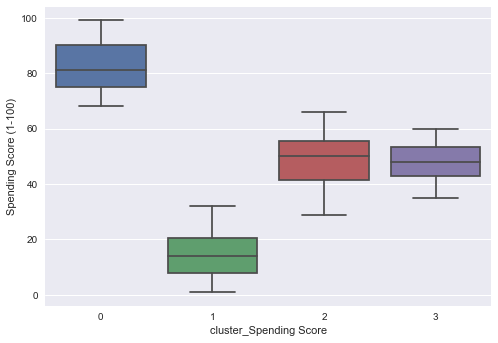

In [38]:
#Visualizing cluster with Spending Score column.
sns.boxplot(x ="cluster_Spending Score", y = "Spending Score (1-100)", data = df2 );

* As we can see:
    1. In cluster 0: Spending Score vary between the range of 70 to 100.
    2. In cluster 1: Spending Score vary between the range of 30 to 65.
    3. In cluster 2: Spending Score vary between the range of 0 to 30.
    4. In cluster 3: Spending Score vary between the range of 35 to 60.

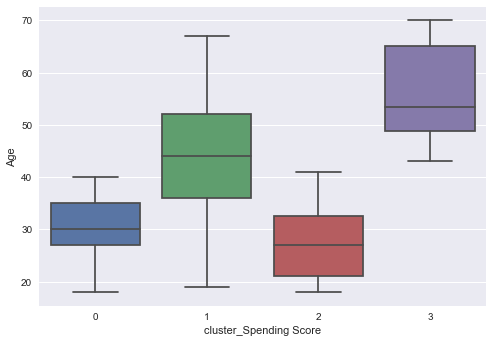

In [39]:
#Visualizing cluster with Age column.
sns.boxplot(x ="cluster_Spending Score", y = "Age", data = df2 );

* As we can see:
    1. In cluster 0: Age vary between the range of 10 to 40.
    2. In cluster 1: Age vary between the range of 10 to 42.
    3. In cluster 2: Age vary between the range of 19 to 65.
    4. In cluster 3: Age vary between the range of 45 to 70.